<a href="https://colab.research.google.com/github/poojamahajan0712/EVA/blob/master/S12_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Assignment A:
Download this TINY IMAGENET (Links to an external site.) dataset. 
Train ResNet18 on this dataset (70/30 split) for 50 Epochs. Target 50%+ Validation Accuracy.''' 

from google.colab import drive

drive.mount( '/content/drive', force_remount=True )
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Cloning into 'IMagenet'...
remote: Enumerating objects: 120594, done.
remote: Total 120594 (delta 0), reused 0 (delta 0), pack-reused 120594
Receiving objects: 100% (120594/120594), 212.68 MiB | 25.07 MiB/s, done.
Resolving deltas: 100% (1115/1115), done.
Checking out files: 100% (120206/120206), done.
test  train  val  wnids.txt  words.txt


In [0]:

%matplotlib inline
#!pip install albumentations==0.4.5
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from PIL import Image
import torch, os
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models


import resnet1
#import model7
from util1 import *
from train_version1 import train
from new_test2 import test
from data_load import dataload
from album1 import album_train,album_test
from movements import sorting



In [0]:
#sorting()

data_transforms = {'train_data':album_train(),'test_data':album_test()}
data_dir = 'IMagenet/tiny-imagenet-200/'
dataloaders=dataload(data_transforms,data_dir)

In [0]:
'''net = model7.Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)
summary(net, input_size=(3, 64, 64))
print(device)'''

In [3]:
net = resnet1.ResNet18(num_classes=200)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)
summary(net, input_size=(3, 64, 64))
print(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
import torch.nn as nn
from torch.optim import SGD,Adam
from torch_lr_finder import LRFinder

criterion = nn.CrossEntropyLoss()
optimizer=SGD(net.parameters(), lr=0.001)
lr_finder=LRFinder(net,optimizer,criterion,device="cuda")
lr_finder.range_test(dataloaders['train_data'],end_lr=1,num_iter=500,step_mode="exp")


Learning rate search finished. See the graph with {finder_name}.plot()


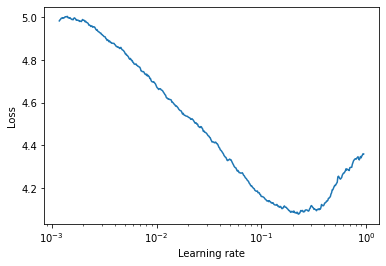

In [0]:
lr_finder.plot()

In [4]:
#Onecycle LR
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9) #,weight_decay=0.003 for L2 regularisation

#final_div_factor=100->min_lr= 0.1/100 ->0.001
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(dataloaders['train_data']), epochs=50, pct_start=0.3,final_div_factor=10.0)

def run():
  train_accs,test_losses,test_accs,pred_wrong_t,true_wrong_t,image_t=([] for i in range(6))
  #lr=[]
  n=50
  for epoch in range(n):
      print("EPOCH:", epoch+1)
      train(net, device, dataloaders['train_data'], criterion, optimizer, epoch,train_accs,scheduler)
      test((epoch==(n-1)),net, device, dataloaders['test_data'], criterion, test_losses, test_accs,pred_wrong_t,true_wrong_t,image_t)

  return(train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t)
 

train_accs,test_accs,pred_wrong_t,true_wrong_t,image_t=run()

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


Loss=5.086782932281494 Batch_id=150 Accuracy=2.14: 100%|██████████| 151/151 [02:56<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0099, Accuracy: 1274/33000 (3.86%)

EPOCH: 2


Loss=4.896755695343018 Batch_id=150 Accuracy=5.06: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0093, Accuracy: 2035/33000 (6.17%)

EPOCH: 3


Loss=4.283328533172607 Batch_id=150 Accuracy=7.96: 100%|██████████| 151/151 [02:51<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0088, Accuracy: 2817/33000 (8.54%)

EPOCH: 4


Loss=4.111414432525635 Batch_id=150 Accuracy=11.35: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 3923/33000 (11.89%)

EPOCH: 5


Loss=3.9328856468200684 Batch_id=150 Accuracy=14.94: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 4697/33000 (14.23%)

EPOCH: 6


Loss=3.6161043643951416 Batch_id=150 Accuracy=18.43: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 5496/33000 (16.65%)

EPOCH: 7


Loss=3.448209524154663 Batch_id=150 Accuracy=21.72: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 6085/33000 (18.44%)

EPOCH: 8


Loss=3.1880621910095215 Batch_id=150 Accuracy=25.03: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 7343/33000 (22.25%)

EPOCH: 9


Loss=3.1808669567108154 Batch_id=150 Accuracy=28.22: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 7355/33000 (22.29%)

EPOCH: 10


Loss=3.013270616531372 Batch_id=150 Accuracy=31.05: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8225/33000 (24.92%)

EPOCH: 11


Loss=2.7286903858184814 Batch_id=150 Accuracy=33.83: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 9133/33000 (27.68%)

EPOCH: 12


Loss=2.7272887229919434 Batch_id=150 Accuracy=36.59: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 9637/33000 (29.20%)

EPOCH: 13


Loss=2.465010643005371 Batch_id=150 Accuracy=39.18: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 9655/33000 (29.26%)

EPOCH: 14


Loss=2.463020086288452 Batch_id=150 Accuracy=41.53: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 9909/33000 (30.03%)

EPOCH: 15


Loss=2.301990032196045 Batch_id=150 Accuracy=43.82: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 10853/33000 (32.89%)

EPOCH: 16


Loss=2.216860294342041 Batch_id=150 Accuracy=45.98: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 11408/33000 (34.57%)

EPOCH: 17


Loss=2.001896619796753 Batch_id=150 Accuracy=48.44: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 11047/33000 (33.48%)

EPOCH: 18


Loss=2.1815075874328613 Batch_id=150 Accuracy=50.37: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 12413/33000 (37.62%)

EPOCH: 19


Loss=1.979237675666809 Batch_id=150 Accuracy=52.53: 100%|██████████| 151/151 [02:54<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 11924/33000 (36.13%)

EPOCH: 20


Loss=1.929011583328247 Batch_id=150 Accuracy=54.31: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 11598/33000 (35.15%)

EPOCH: 21


Loss=1.8829973936080933 Batch_id=150 Accuracy=56.73: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 12020/33000 (36.42%)

EPOCH: 22


Loss=1.6027265787124634 Batch_id=150 Accuracy=58.87: 100%|██████████| 151/151 [02:54<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 12192/33000 (36.95%)

EPOCH: 23


Loss=1.8038856983184814 Batch_id=150 Accuracy=60.83: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 12937/33000 (39.20%)

EPOCH: 24


Loss=1.6162792444229126 Batch_id=150 Accuracy=62.84: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 13431/33000 (40.70%)

EPOCH: 25


Loss=1.266361117362976 Batch_id=150 Accuracy=65.38: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 13598/33000 (41.21%)

EPOCH: 26


Loss=1.3733347654342651 Batch_id=150 Accuracy=67.47: 100%|██████████| 151/151 [02:51<00:00,  1.13s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 13152/33000 (39.85%)

EPOCH: 27


Loss=1.4685235023498535 Batch_id=150 Accuracy=69.67: 100%|██████████| 151/151 [02:51<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 13464/33000 (40.80%)

EPOCH: 28


Loss=1.1429417133331299 Batch_id=150 Accuracy=72.31: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 12880/33000 (39.03%)

EPOCH: 29


Loss=1.1743481159210205 Batch_id=150 Accuracy=74.71: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 13271/33000 (40.22%)

EPOCH: 30


Loss=1.0259395837783813 Batch_id=150 Accuracy=77.12: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 12849/33000 (38.94%)

EPOCH: 31


Loss=0.9558835029602051 Batch_id=150 Accuracy=79.88: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 13798/33000 (41.81%)

EPOCH: 32


Loss=0.6149028539657593 Batch_id=150 Accuracy=82.40: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 13634/33000 (41.32%)

EPOCH: 33


Loss=0.7445782423019409 Batch_id=150 Accuracy=84.97: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 13661/33000 (41.40%)

EPOCH: 34


Loss=0.6637870669364929 Batch_id=150 Accuracy=87.21: 100%|██████████| 151/151 [02:52<00:00,  1.14s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 13868/33000 (42.02%)

EPOCH: 35


Loss=0.5146059989929199 Batch_id=150 Accuracy=89.77: 100%|██████████| 151/151 [03:01<00:00,  1.20s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 13722/33000 (41.58%)

EPOCH: 36


Loss=0.5415385961532593 Batch_id=150 Accuracy=91.89: 100%|██████████| 151/151 [03:03<00:00,  1.22s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 14444/33000 (43.77%)

EPOCH: 37


Loss=0.3269333243370056 Batch_id=150 Accuracy=93.50: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 14874/33000 (45.07%)

EPOCH: 38


Loss=0.38327860832214355 Batch_id=150 Accuracy=94.97: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 15063/33000 (45.65%)

EPOCH: 39


Loss=0.2530648410320282 Batch_id=150 Accuracy=96.31: 100%|██████████| 151/151 [02:54<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 15145/33000 (45.89%)

EPOCH: 40


Loss=0.20384298264980316 Batch_id=150 Accuracy=96.88: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 15377/33000 (46.60%)

EPOCH: 41


Loss=0.22950562834739685 Batch_id=150 Accuracy=97.75: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 15473/33000 (46.89%)

EPOCH: 42


Loss=0.2238956093788147 Batch_id=150 Accuracy=98.20: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 15560/33000 (47.15%)

EPOCH: 43


Loss=0.18468482792377472 Batch_id=150 Accuracy=98.58: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 15800/33000 (47.88%)

EPOCH: 44


Loss=0.1251203864812851 Batch_id=150 Accuracy=98.75: 100%|██████████| 151/151 [02:54<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 15776/33000 (47.81%)

EPOCH: 45


Loss=0.12690691649913788 Batch_id=150 Accuracy=99.10: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 15856/33000 (48.05%)

EPOCH: 46


Loss=0.11477150022983551 Batch_id=150 Accuracy=99.20: 100%|██████████| 151/151 [02:54<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 15949/33000 (48.33%)

EPOCH: 47


Loss=0.08745796233415604 Batch_id=150 Accuracy=99.32: 100%|██████████| 151/151 [02:54<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 15960/33000 (48.36%)

EPOCH: 48


Loss=0.09611856192350388 Batch_id=150 Accuracy=99.37: 100%|██████████| 151/151 [02:54<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 16012/33000 (48.52%)

EPOCH: 49


Loss=0.11022747308015823 Batch_id=150 Accuracy=99.40: 100%|██████████| 151/151 [02:53<00:00,  1.15s/it]
  0%|          | 0/151 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 15975/33000 (48.41%)

EPOCH: 50


Loss=0.09947068989276886 Batch_id=150 Accuracy=99.45: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]


Test set: Average loss: 0.0047, Accuracy: 15984/33000 (48.44%)

